In [35]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from scipy.stats import ttest_ind

# I added the libraries from our assignments we can remove the ones we dont end up using later

In [36]:
# Data Pre-Processing:
data = pd.read_csv('data.csv')   # this reads the dataset and stores it in data
data = data.drop(columns=['id', 'Unnamed: 32'])   # missing values removed here
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})   # this is one-hot encoding chnaging malignants to 1 and benigns to 0

print(data.isnull().sum())  # This proves our cleanup of missing values did work as intended

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [37]:
print(data.head())
data.describe()

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

# Constuct Logisitc Regression Model

Logistic Regression Model is defined as: 

$$P(Y_i = 1) = \pi_i = \frac{\exp(\beta_0 + \beta_1 x_{i1} + \cdots + \beta_p x_{ip})}{1 + \exp(\beta_0 + \beta_1 x_{i1} + \cdots + \beta_p x_{ip})}$$

Fit the prediction to S-curve (1 = malignant,, 0 = benign)
- If the prediction value is above 0.5, then we will predict it has value of 1 
- If the prediction value is below 0.5, then will prodeict it haa a value of 0. 

Text(0.5, 1.0, 'Breast Cancer Diagnosis (1 = Malignant, 0 = Benign)')

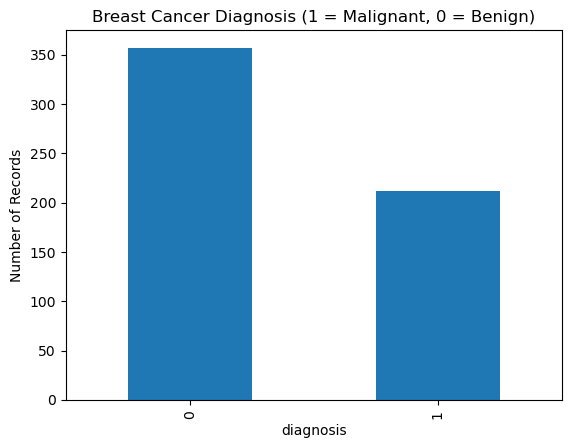

In [39]:
# Construct plot to plot the number of 1 = malignant, 0 = benign
diagnosis_data = data['diagnosis'].value_counts()

# Construct bar plot of the diagnosis data (1 = malignant,, 0 = benign)
diagnosis_data.plot(kind='bar')
plt.ylabel('Number of Records')
plt.title('Breast Cancer Diagnosis (1 = Malignant, 0 = Benign)')

# T-Test on Radius Mean

In [40]:
malignant = data[data['diagnosis'] == 1]['radius_mean'] # Here we get the people who are diagnosed as malignant and get their radius means
benign = data[data['diagnosis'] == 0]['radius_mean'] # Here we get the people who are diagnosed as benign and get their radius means
t_statistic, p_value = ttest_ind(malignant, benign, equal_var=False) # This is an independant two sample t test with first 2 parameters as our samples and the equal variance is false since we dont assume they have equal variances. This means we use welch's t test, which is more robust.
print(f"T-Statistic: {t_statistic:.3f}, P-Value: {p_value:.3f}") # This outputs the t score and p value

if p_value < 0.05:                                                  # This checks if our p value is under the confidence level 
    print("Significant difference in radius_mean between classes.") # if it is then we reject null hypothesis and there is a significant difference
else:
    print("No significant difference present.")                     # otherwise we fail to reject null hypothesis due to a lack of evidence

#Denis

T-Statistic: 22.209, P-Value: 0.000
Significant difference in radius_mean between classes.


# Splitting & Scaling the Data 

In [41]:
X = data.drop('diagnosis', axis=1) # Here we rmove the diagnosis column, so only the features are kept. This is because leaving diagnosis in would be like letting the model cheat and see the answers when predicting.
y = data['diagnosis'] # This sets y as the target variable, what we are trying to predict which is the diagnosis.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # this splits the dataset into training and test sets. 80% training and 20% test. Random state ensures reporducibility by using the same shuffle every time. 
scaler = StandardScaler() # this sets a standard scaler object for normalizing features
X_train_scaled = scaler.fit_transform(X_train) # this follows 3 main steps. In fit it calculates mean and sd of each feature based on training data to avoid leakage. Then in transform each feature in x_train is scaled to z=(x-mean)/sd. Then we get the result, x_train_scaled has a zero mean and unit variance accross each column.
X_test_scaled = scaler.transform(X_test) # since the mean and sd was calculated in the line before whilst fitting here we just use that to transform the test set the same way.

#Denis

# Model Creation

In [ ]:
log_reg = LogisticRegression(max_iter=1000) # here we create a logistic regression model, max iterations = 1000 allows more iterations for the solver to converge.
log_reg.fit(X_train_scaled, y_train) # Here we train the model using the scaled training data, y_train provides correct outputs so the model can learn and adjust accordingly.
log_predictions = log_reg.predict(X_test_scaled) # here we make predictions using our model on the scaled test data.

ran_forest = RandomForestClassifier(random_state=42) # here we create a random forest model, random_state = 42 ensures reproducability of the tree building process
ran_forest.fit(X_train, y_train) # this trains the model using unscaled training data since random forest does not need scaling. y_train provides correct outputs so the model can learn and adjust accordingly.
ran_forest_predictions = ran_forest.predict(X_test) # then this makes predictions using our model on the test data.

#Denis

# Model Results

In [ ]:
print("Logistic Regression Results: ")
print(classification_report(y_test, log_predictions))         # Here the results of the logistic regression model are outputted. This result is a comparison of the correct predictions from the y_train and the results of our model's predicition.
print("Random Forest Results: ")
print(classification_report(y_test, ran_forest_predictions)) # Here the results of the random forrest model are outputted. This result is a comparison of the correct predictions from the y_train and the results of our model's predicition.

#Pros

Logistic Regression Results: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Random Forest Results: 
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

